#**Estimasi Kategori Level Obesitas Berdasarkan Kondisi fisik dan Pola Makan**



*   Nama    : Wiefran Varenzo
*   Email   : lionwiefran88@gmail.com
*   Username: Wiefran Varenzo





Proyek ini bertujuan untuk memprediksi tingkat obesitas seseorang berdasarkan kebiasaan makan dan kondisi fisik pengguna. Dengan memanfaatkan algoritma pembelajaran mesin, sistem ini dibangun untuk membantu memahami faktor-faktor yang berkontribusi terhadap obesitas dan memberikan prediksi berdasarkan kondisi fisik yang dikumpulkan melalui data survei.

# **1. Perkenalan Dataset**


## **Sumber Dataset**

Dataset ini diambil dari [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition) dengan judul:
**"Estimation of Obesity Levels Based On Eating Habits and Physical Condition"**

## **Gambaran Umum Dataset**

* **Jumlah Baris**: 2.111
* **Jumlah Kolom**: 17 fitur yang mencerminkan kebiasaan makan dan gaya hidup
* **Jenis Data**: Kombinasi data **kategorikal**, **biner**, dan **numerikal**

### **Tipe Fitur**

* **Numerikal (Kontinu & Integer)**:

  * `Age` (Umur)
  * `Height` (Tinggi badan)
  * `Weight` (Berat badan)
  * `FCVC` (Frekuensi makan sayur)
  * `NCP` (Jumlah makan utama per hari)
  * `CH2O` (Jumlah konsumsi air per hari)
  * `FAF` (Frekuensi aktivitas fisik)
  * `TUE` (Waktu penggunaan perangkat teknologi)

* **Kategorikal / Biner**:

  * `Gender` (Jenis kelamin)
  * `family_history_with_overweight` (Riwayat keluarga dengan obesitas)
  * `FAVC` (Konsumsi makanan tinggi kalori)
  * `CAEC` (Makan di antara jam makan utama)
  * `SMOKE` (Merokok atau tidak)
  * `SCC` (Pemantauan kalori harian)
  * `CALC` (Frekuensi konsumsi alkohol)
  * `MTRANS` (Jenis transportasi yang digunakan)

* **Target**:

  * `NObeyesdad`: Level obesitas yang diprediksi (kategori klasifikasi)


# **2. Import Library**

Impor library ini mencakup seluruh pipeline machine learning: mulai dari manipulasi data (pandas, numpy), visualisasi (matplotlib, seaborn), preprocessing dan feature selection (scikit-learn, SMOTE), hingga modeling (Random Forest, SVM) dan evaluasi (akurasi, F1-score, dll). Juga disertakan tools untuk download dataset (requests, zipfile) dan penyimpanan model (joblib). Pendeknya, ini adalah toolkit lengkap untuk proyek klasifikasi obesitas berbasis kondisi fisik dan pola hidup.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import requests
import zipfile
import io
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, cohen_kappa_score,
    matthews_corrcoef
)
from imblearn.over_sampling import SMOTE
from scipy.stats import skew

# **3. Memuat Dataset**

Cell ini secara otomatis mengunduh dan mengekstrak dataset obesitas dari UCI Repository, lalu membaca file CSV di dalamnya ke dalam DataFrame df menggunakan pandas.

In [2]:
url = "https://archive.ics.uci.edu/static/public/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip"

response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    print("Files in ZIP:", z.namelist())

    with z.open("ObesityDataSet_raw_and_data_sinthetic.csv") as csv_file:
        df = pd.read_csv(csv_file)

Files in ZIP: ['ObesityDataSet_raw_and_data_sinthetic.csv']


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Saya melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA disini bertujuan untuk:

1. **Memahami Struktur Data**
   - Saya menggunakan df.info() untuk melihat informasi umum mengenai dataset seperti jumlah baris, jumlah kolom, dan tipe data di masing-masing kolom.
   - df.describe() digunakan untuk menghasilkan statistik deskriptif dari fitur numerik seperti rata-rata (mean), standar deviasi (std), nilai minimum, maksimum, serta kuartil (25%, 50%, dan 75%).

2. **Menangani Data yang Hilang**  
   - Saya menggunakan df.info() untuk melihat apakah terdapat nilai yang hilang (null/missing) pada kolom apa pun.
   - Berdasarkan hasilnya, tidak ada nilai yang hilang secara eksplisit (Non-Null Count dari semua kolom menunjukkan tidak ada kekurangan data).

3. **Analisis Distribusi dan Korelasi**  
   - Distribusi kelas target NObeyesdad dianalisis menggunakan:
    casa

    *   df.Gender.value_counts()
    *   df.CAEC.value_counts()
    *   df.CALC.value_counts()
    *   df.MTRANS.value_counts()


4. **Visualisasi Data**  
   - Histogram dan boxplot: untuk kolom numerik (Age, Height, Weight, dsb).
   - Diagram batang (bar plot): untuk kolom kategorikal (Gender, CAEC, CALC, dsb).
   - Heatmap korelasi: untuk melihat hubungan antar fitur numerik.
   - Pairplot: untuk kombinasi visual antar beberapa fitur sekaligus.


## Memahami Struktur Data

In [3]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Disini saya ingin melihat apa saja data yang terdapat di dataset, sehingga saya memanggil df, untuk menampilkan dataframenya.

In [4]:
# Melihat persebaran dan distribusi data
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Describe() digunakan untuk mengetahui persebaran data, baik itu Q1, Q2, Q3, mean, min, max, dan standar deviasi dari datset numerik


In [5]:
# Melihat informasi tipe data dan jumlah data tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Untuk setiap kolom, tipe datanya sudah tepat, kecuali TransactionDate  dan PreviousTransactionDate yang seharusnya bertipe DateTime

In [6]:
# Melihat jumlah data untuk setiap kategori Level Obesitas
df.NObeyesdad.value_counts()

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


Disini menggunakan value_count() untuk menghitung nilai unik di kolom NObeyesdad (kolom target)

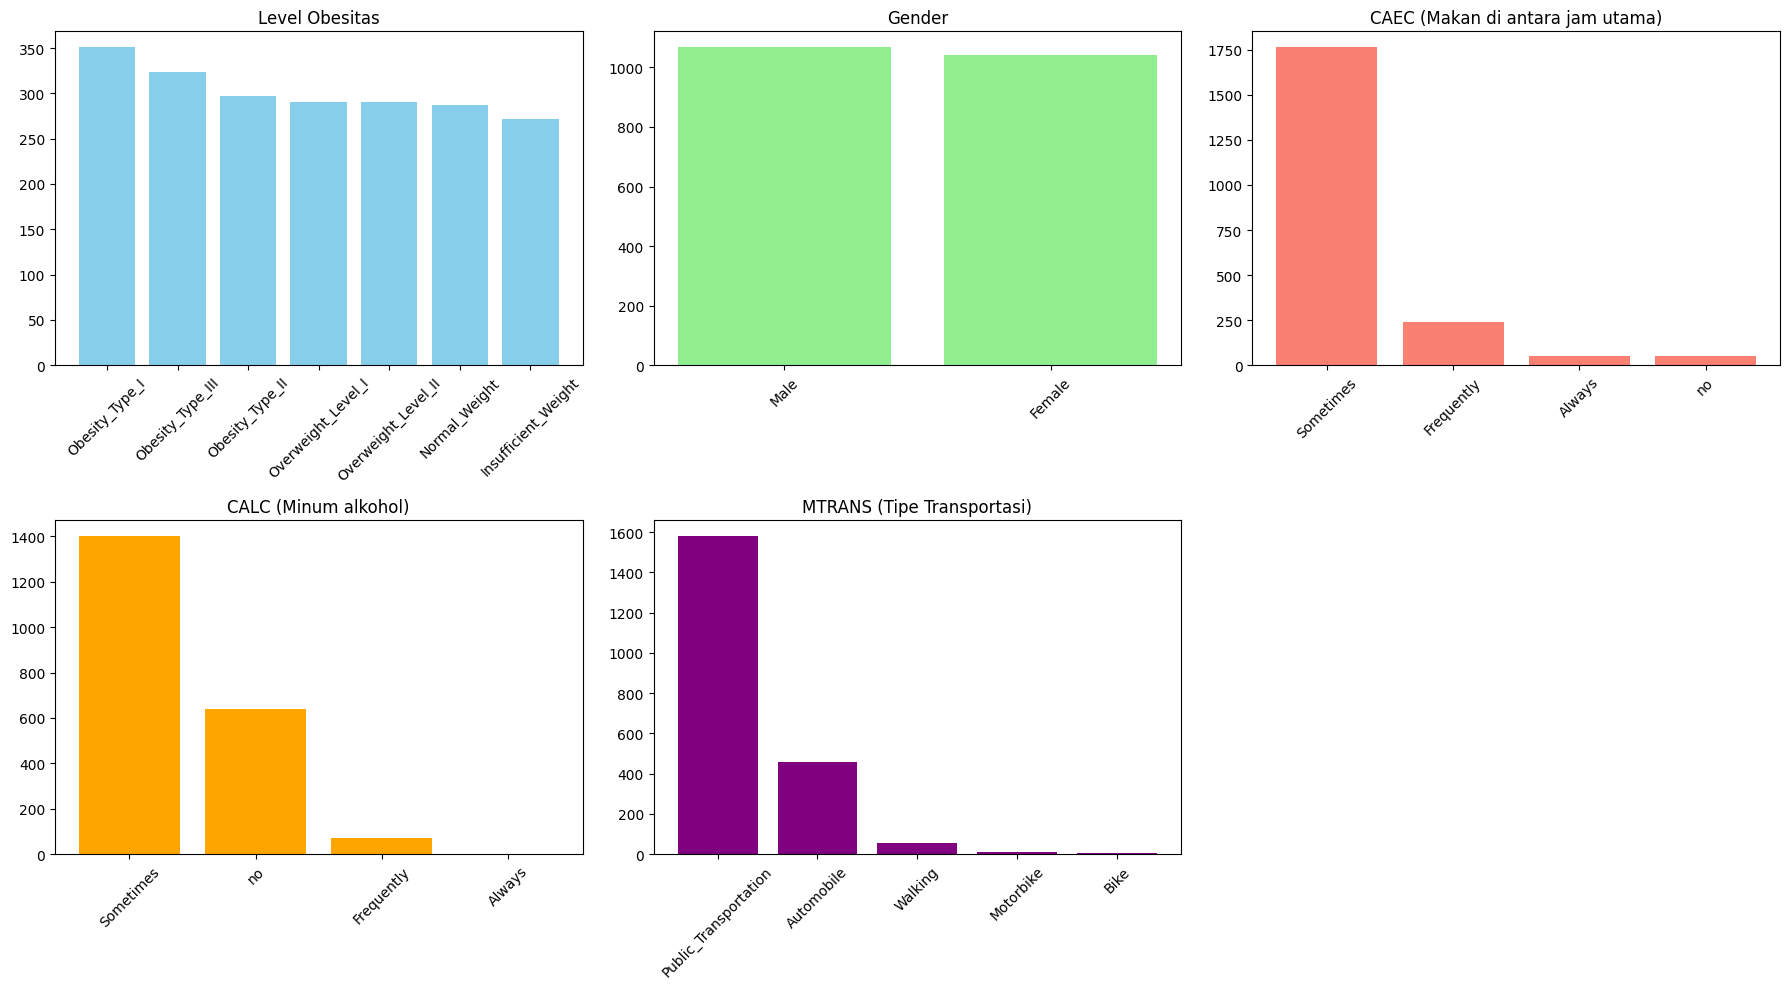

In [7]:
# Data value_counts
level_obesitas = df.NObeyesdad.value_counts()
gender = df.Gender.value_counts()
caec = df.CAEC.value_counts()
calc = df.CALC.value_counts()
mtrans = df.MTRANS.value_counts()

# Buat figure dengan 2 baris dan 3 kolom
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Flatten axs supaya mudah indexing
axs = axs.flatten()

# Plot grafik ke masing-masing subplot
axs[0].bar(level_obesitas.index, level_obesitas.values, color='skyblue')
axs[0].set_title('Level Obesitas')
axs[0].tick_params(axis='x', rotation=45)

axs[1].bar(gender.index, gender.values, color='lightgreen')
axs[1].set_title('Gender')
axs[1].tick_params(axis='x', rotation=45)

axs[2].bar(caec.index, caec.values, color='salmon')
axs[2].set_title('CAEC (Makan di antara jam utama)')
axs[2].tick_params(axis='x', rotation=45)

axs[3].bar(calc.index, calc.values, color='orange')
axs[3].set_title('CALC (Minum alkohol)')
axs[3].tick_params(axis='x', rotation=45)

axs[4].bar(mtrans.index, mtrans.values, color='purple')
axs[4].set_title('MTRANS (Tipe Transportasi)')
axs[4].tick_params(axis='x', rotation=45)

# Kosongkan subplot ke-6 yang gak dipakai
axs[5].axis('off')

plt.tight_layout()
plt.show()


Bisa dilihat bahwa dataset ini adalah hasil responden data yang berimbang untuk gender laki-laki dan perempuan, sedangkan memiliki keragaman yang cukup tinggi di kolom kategorial lainnya

In [8]:
# Melihat kolom berdasarkan tipe data Numerik atau Kategori
num_cols_df = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols_df = df.select_dtypes(include=['object', 'category']).columns
print(f'Kolom Numerik: {num_cols_df}')
print(f'Kolom Kategori: {cat_cols_df}')

Kolom Numerik: Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')
Kolom Kategori: Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


Melilhat kolom berdasarkan tipe akan sangat membantu dalam proses preprocessing, terutama dalam normalisasi feature/kolom

## Menangani Data yang Hilang dan duplikat


In [9]:
# Melihat data null
df.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


isna().sum() digunakan untuk menghitung berapa banyak data null untuk setiap kolom, dimana jika dilihat, tidak ada nilai null dalam kolom dataset.

In [10]:
# Melihat seberapa banyak data duplikat
df.duplicated().sum()

np.int64(24)

Terdapat 24 data yang duplikat, serta tidak ada data null/missing value untuk setiap kolomnya.

## Analisis Distribusi dan Korelasi

<ipython-input-11-ac91807516cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NObeyesdad', data=df, palette='Set2')


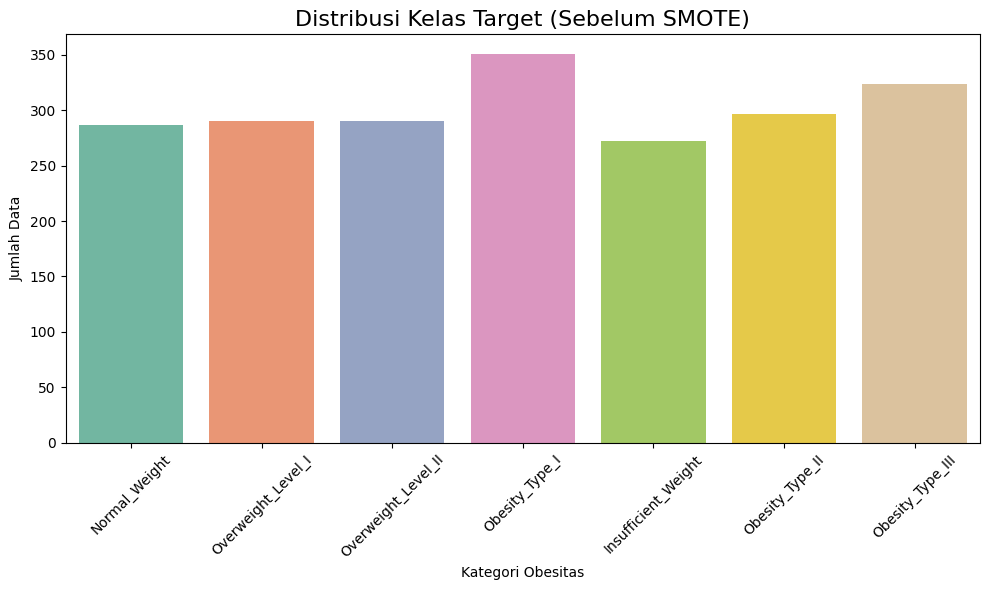

In [11]:
# Visualisasi distribusi label target
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=df, palette='Set2')
plt.title('Distribusi Kelas Target (Sebelum SMOTE)', fontsize=16)
plt.xlabel('Kategori Obesitas')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Feature Target memiliki data yang imbalanced, sehingga diperlukan SMOTE agar tidak terjadi overfitting ke arah kelas yang memiliki data lebih banyak.

In [12]:
# Menghitung korelasi untuk setiap kolom numerik
valid_num_cols = [col for col in num_cols_df if col in df.columns]
corr_matrix = df[valid_num_cols].corr()
print(corr_matrix)

             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.025958  0.202560  0.016291 -0.043944 -0.045304 -0.144938   
Height -0.025958  1.000000  0.463136 -0.038121  0.243672  0.213376  0.294709   
Weight  0.202560  0.463136  1.000000  0.216125  0.107469  0.200575 -0.051436   
FCVC    0.016291 -0.038121  0.216125  1.000000  0.042216  0.068461  0.019939   
NCP    -0.043944  0.243672  0.107469  0.042216  1.000000  0.057088  0.129504   
CH2O   -0.045304  0.213376  0.200575  0.068461  0.057088  1.000000  0.167236   
FAF    -0.144938  0.294709 -0.051436  0.019939  0.129504  0.167236  1.000000   
TUE    -0.296931  0.051912 -0.071561 -0.101135  0.036326  0.011965  0.058562   

             TUE  
Age    -0.296931  
Height  0.051912  
Weight -0.071561  
FCVC   -0.101135  
NCP     0.036326  
CH2O    0.011965  
FAF     0.058562  
TUE     1.000000  


Disini, perhitungan tingkat korelasi adalah dasar dari pembuatan heatmap korelasi untuk mengetahui dampak suatu feature dengan feature lainnya.

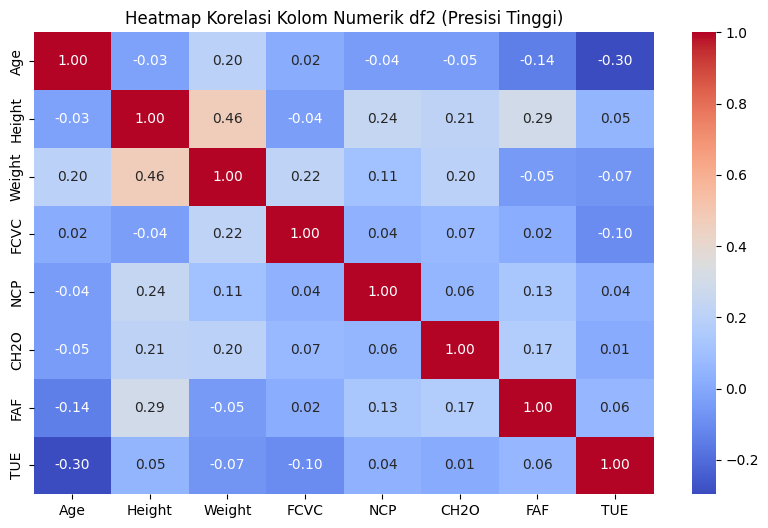

In [13]:
# Visualisasi korelasi untuk setiap kolom numerik
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Kolom Numerik df2 (Presisi Tinggi)')
plt.show()

Kalau dilihat, weight dan height cukup berkorelasi, dan juga FAF (aktivitas fisik) serta height juga berkorelasi cukup baik juga.

## Visualisasi Data

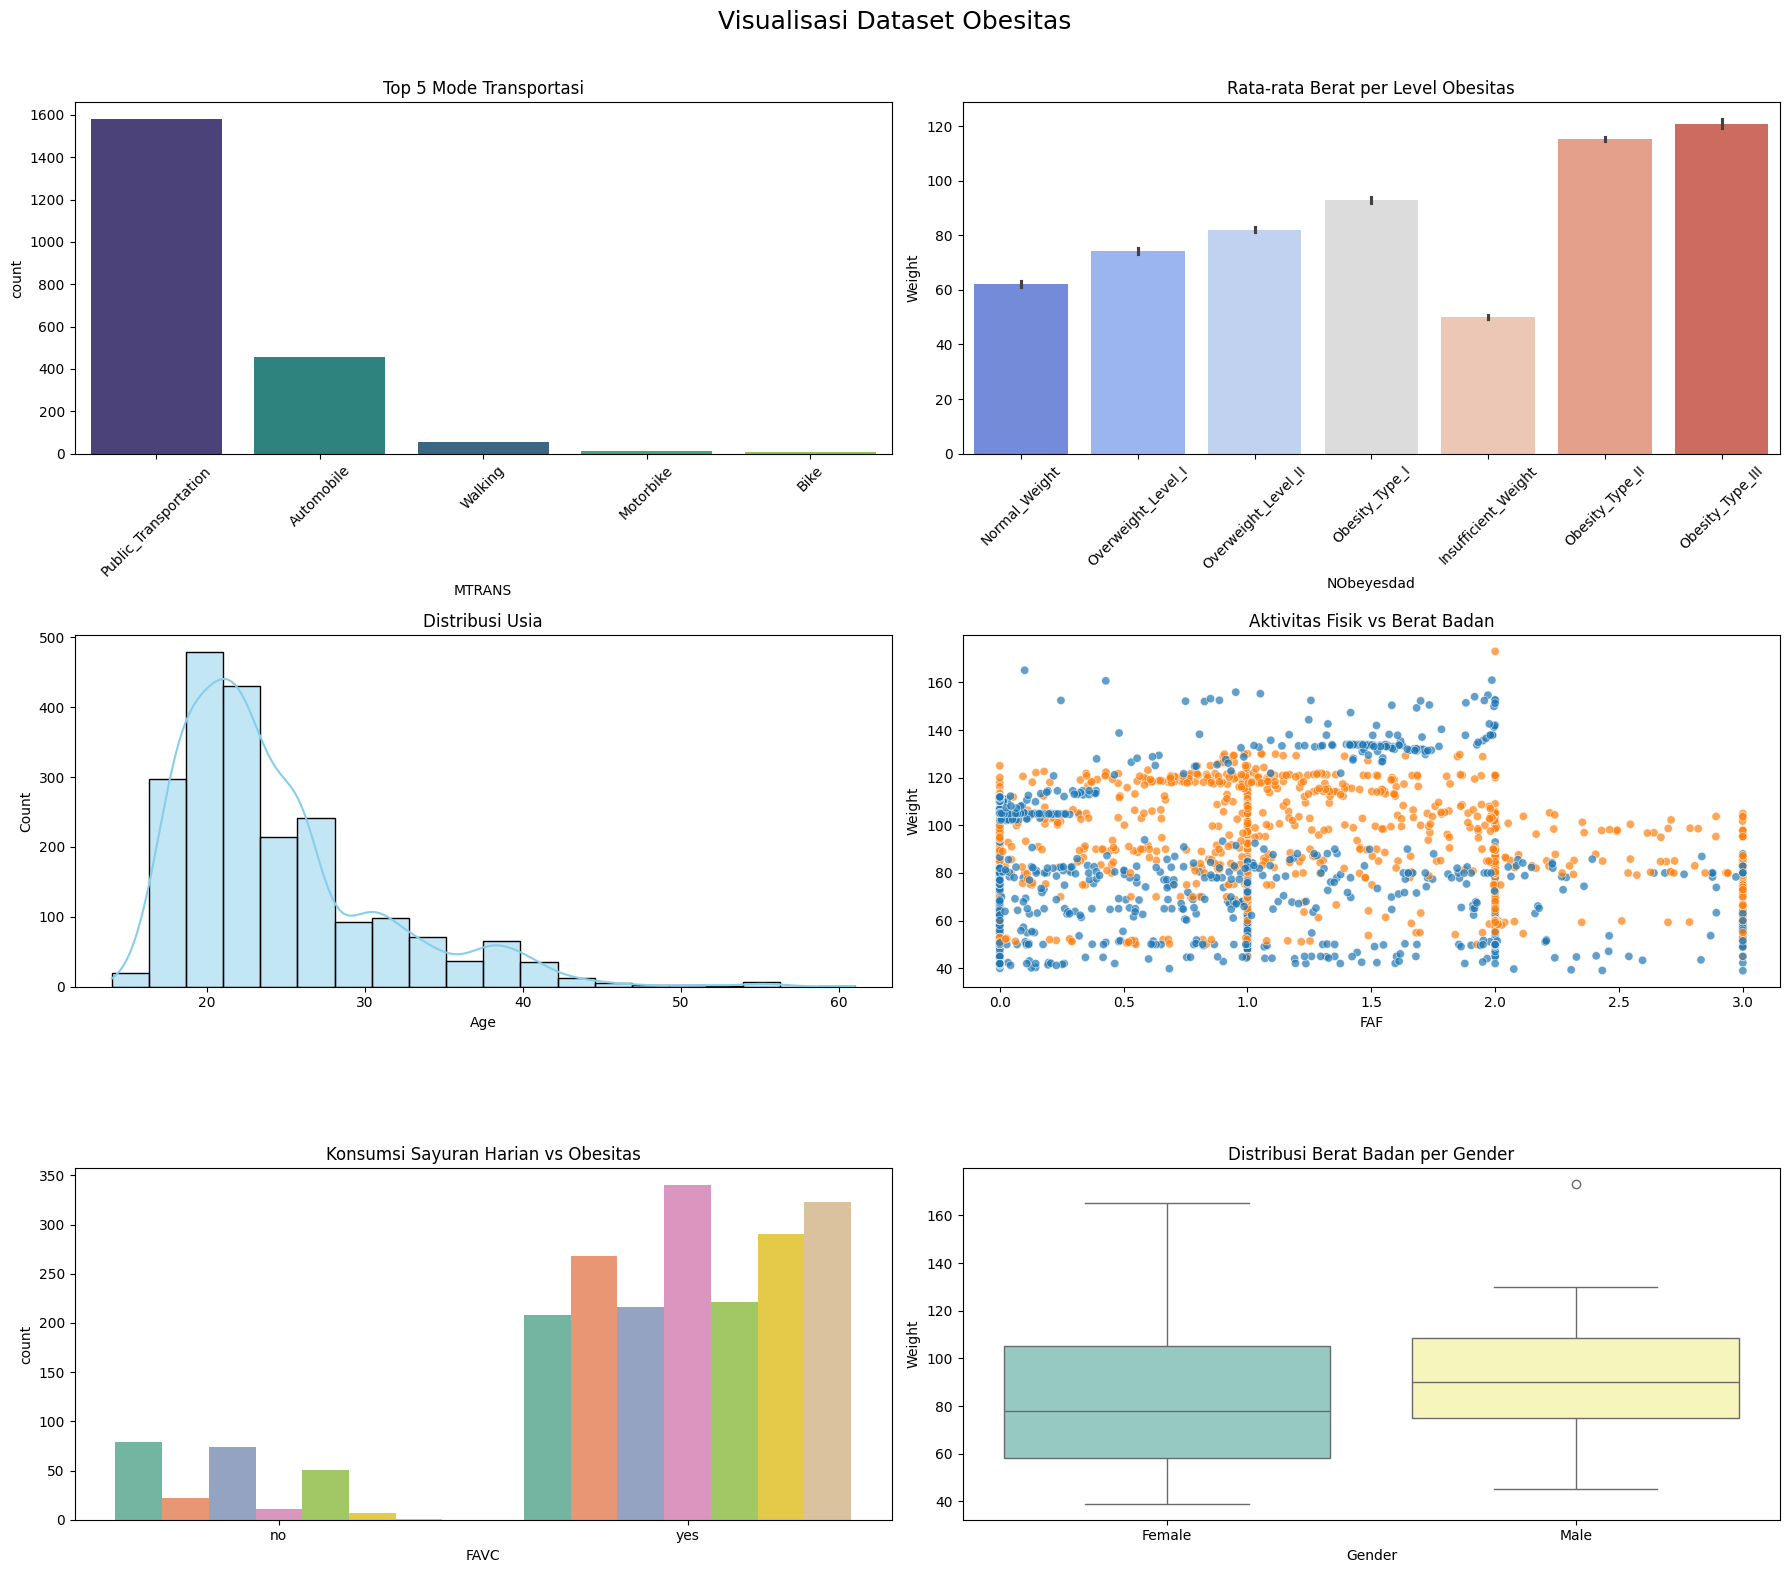

In [14]:
# Plotting
fig, axes = plt.subplots(3, 2, figsize=(18, 16))
fig.suptitle('Visualisasi Dataset Obesitas', fontsize=18)

# 1. Top Transportasi yang Dipakai (Top 5)
top_transport = df['MTRANS'].value_counts().nlargest(5).index
sns.countplot(data=df[df['MTRANS'].isin(top_transport)], x='MTRANS', hue='MTRANS', order=top_transport, palette='viridis', legend=False, ax=axes[0, 0])
axes[0, 0].set_title('Top 5 Mode Transportasi')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Rata-rata Berat berdasarkan Level Obesitas
sns.barplot(data=df, x='NObeyesdad', y='Weight', hue='NObeyesdad', estimator='mean', palette='coolwarm', legend=False, ax=axes[0, 1])
axes[0, 1].set_title('Rata-rata Berat per Level Obesitas')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Distribusi Usia
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue', legend=False, ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Usia')

# 4. Aktivitas Fisik vs Berat Badan
sns.scatterplot(data=df, x='FAF', y='Weight', hue='Gender', alpha=0.7, legend=False, ax=axes[1, 1])
axes[1, 1].set_title('Aktivitas Fisik vs Berat Badan')

# 5. Konsumsi Sayuran Harian vs Obesitas (Distribusi)
sns.countplot(data=df, x='FAVC', hue='NObeyesdad', palette='Set2', legend=False, ax=axes[2, 0])
axes[2, 0].set_title('Konsumsi Sayuran Harian vs Obesitas')

# 6. Boxplot Berat per Gender
sns.boxplot(data=df, x='Gender', y='Weight', hue='Gender', palette='Set3', legend=False, ax=axes[2, 1])
axes[2, 1].set_title('Distribusi Berat Badan per Gender')

plt.tight_layout(rect=[0, 0, 1, 0.97])  # space for main title
plt.show()


Disini saya bisa kita lihat bahwa distribusi nilai numerik sangat beragam. Berikut beberapa insight yang bisa kita temukan:

* lebih dari setengah responden memilih public transportation sebegai alat mobilitas
* Rata-rata berat obesitas berdasarkan level memiliki perbedaan yang cukup significan, tetapi untuk obesitas level II dan Obesitas level III, perbedaan rata-rata berat badannya cukup kecil
* Weight di atas 120 tidak ada yang memiliki frekuensi berolahraga lebih dari 2 kali.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [15]:
# Menghapus data null
df = df.dropna()

dropna() digunakan untuk menghapus setiap data null yang ada di setiap kolomnya

In [16]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [17]:
df.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [18]:
# Menghapus data duplikat
df = df.drop_duplicates()

In [19]:
df.duplicated().sum()

np.int64(0)

Sekarang, dataset tidak memiliki data duplikat lagi, dan dikarenakan data yang duplikat sedikit, maka saya drop saja karena tidak akan terlalu berdampak pada pengurangan informasi.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             2087 no

df.info() saya gunakan untuk mengetahui kondisi saat ini setelah saya melakukan pembersihan data null dan duplikat.

Kolom: Age
Jumlah outlier: 167
      Age
13   41.0
21   52.0
33   39.0
92   55.0
104  38.0
----------------------------------------
Kolom: Height
Jumlah outlier: 1
     Height
349    1.98
----------------------------------------
Kolom: Weight
Jumlah outlier: 1
     Weight
344   173.0
----------------------------------------
Kolom: FCVC
Jumlah outlier: 0
Empty DataFrame
Columns: [FCVC]
Index: []
----------------------------------------
Kolom: NCP
Jumlah outlier: 577
    NCP
4   1.0
14  1.0
16  1.0
17  1.0
18  4.0
----------------------------------------
Kolom: CH2O
Jumlah outlier: 0
Empty DataFrame
Columns: [CH2O]
Index: []
----------------------------------------
Kolom: FAF
Jumlah outlier: 0
Empty DataFrame
Columns: [FAF]
Index: []
----------------------------------------
Kolom: TUE
Jumlah outlier: 0
Empty DataFrame
Columns: [TUE]
Index: []
----------------------------------------


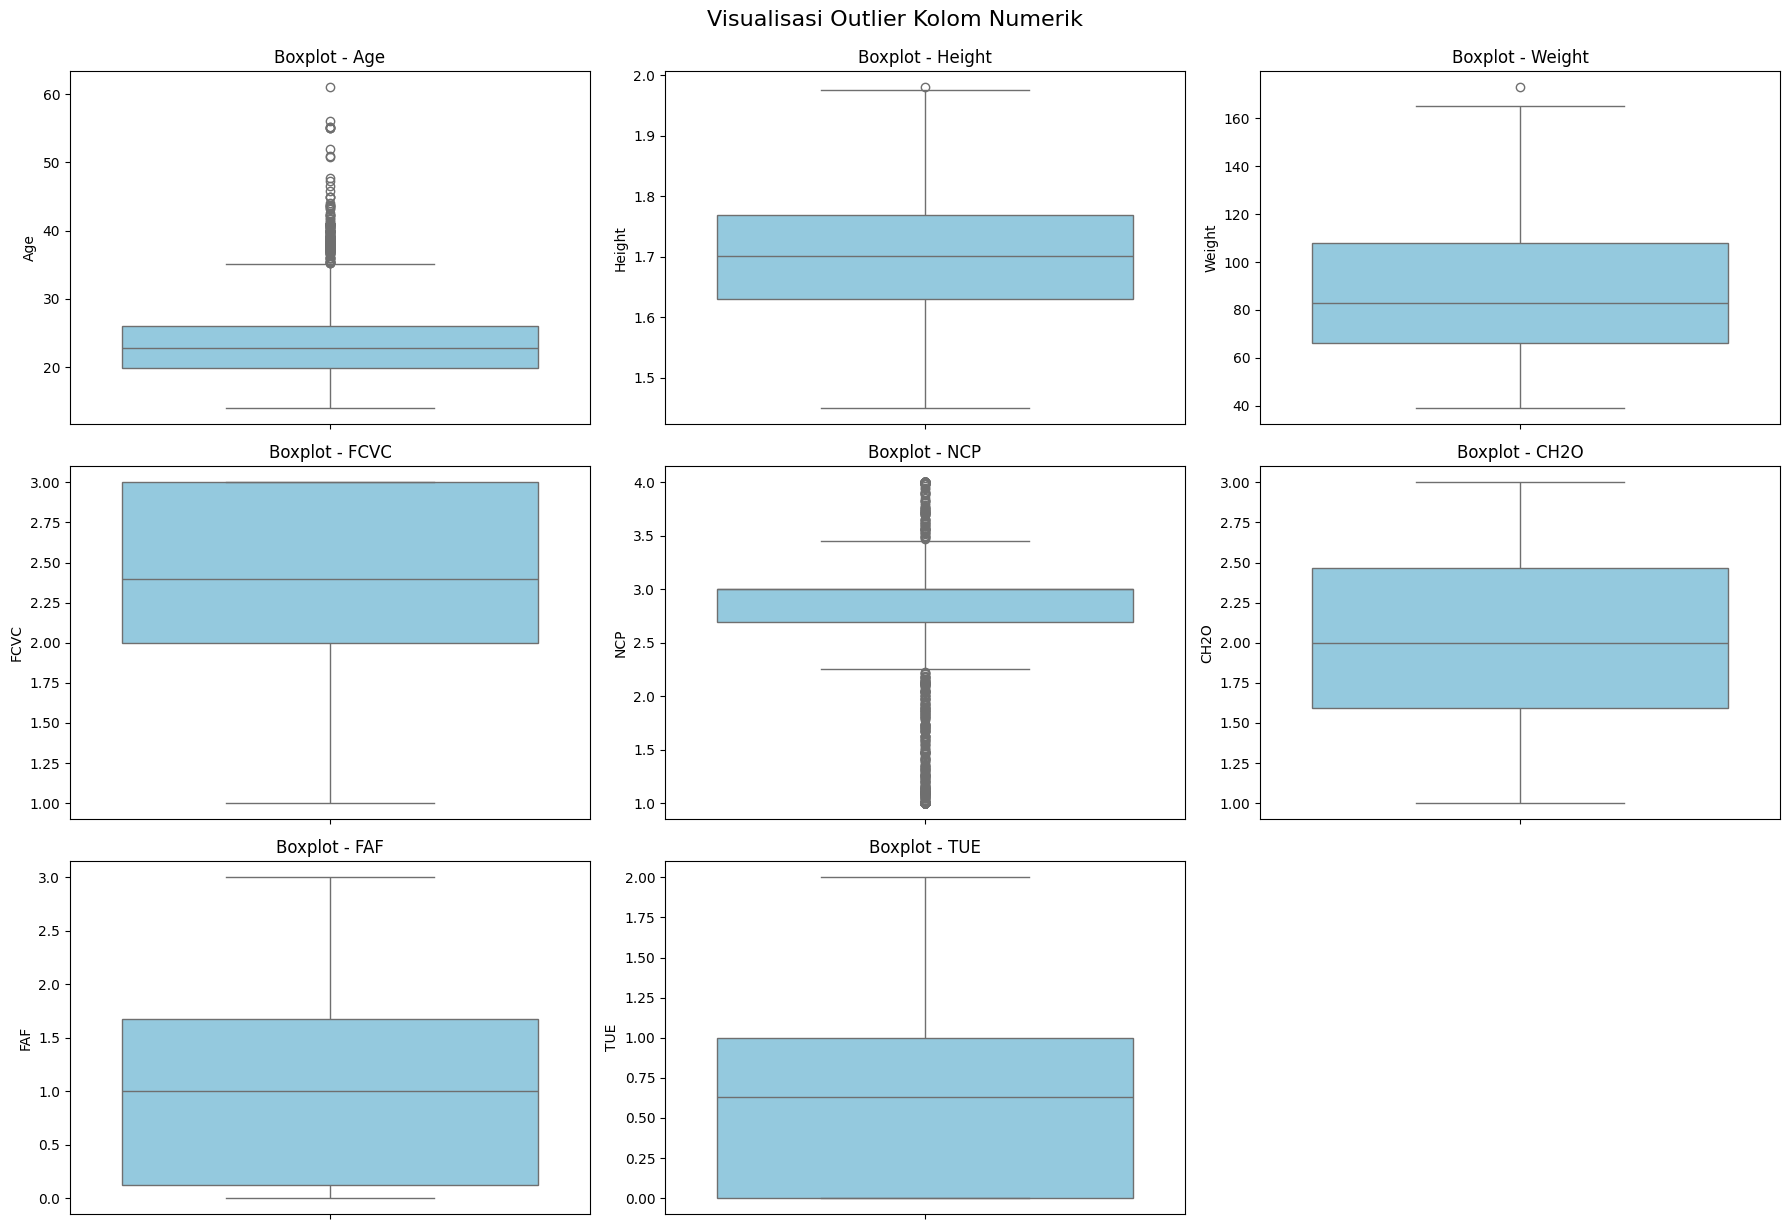

In [21]:
# Mendeteksi outlier dengan metode IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

for col in valid_num_cols:
    outliers, low, up = detect_outliers_iqr(df, col)
    print(f"Kolom: {col}")
    print(f"Jumlah outlier: {len(outliers)}")
    print(outliers[[col]].head())
    print("-" * 40)

plt.figure(figsize=(18, 12))
for i, col in enumerate(valid_num_cols[:9]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Boxplot - {col}')
    plt.tight_layout()

plt.suptitle('Visualisasi Outlier Kolom Numerik', fontsize=16, y=1.02)
plt.show()

Outlier ini kita simpan, karena ini adalah data yang diambil dari dunia nyata, dan data yang outlier disini masih dalam jangka yang normal (tidak melewati batas normal, seperti umur 200 tahun atau sebagainya)

In [22]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [23]:
#Melihat kembali persebaran data setelah preprocessing
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Dilihat dari persebaran data numerik, tidak ada yang melewati batas normal. Contohnya, umur yang paling tinggi adalah 61. Kemudian, dari persebaran datanya, setiap kolom memiliki persebaran yang normal.

In [24]:
# Urutan label target sesuai yang diinginkan
order = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]
# Buat salinan data
data = df.copy()

# Mapping target ke angka
target_map = {label: idx for idx, label in enumerate(order)}
data['NObeyesdad'] = data['NObeyesdad'].map(target_map)

# Label Encoding fitur kategorikal selain target
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    if col != 'NObeyesdad':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

# Normalisasi untuk kolom numerik (selain target)
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.drop('NObeyesdad')
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

Menetapkan map manual urutan indeks sebelum dilakukannya normalisasi kolom target bertujuan untuk menjaga konsistensi urutan data setelah dilakuaknnya label encoder. Nantinya, kolom target akan bernilai 0-6, Karena menggunakan data ordinal, setiap kenaikan angka haruslah berindikasi pada kenaikan level obesitas.

In [25]:
# Melakukan pemisahan data, yaitu 80% train dan 20% test
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Distribusi label setelah SMOTE:\n", pd.Series(y_train_sm).value_counts())

Distribusi label setelah SMOTE:
 NObeyesdad
6    281
2    281
1    281
0    281
3    281
4    281
5    281
Name: count, dtype: int64


<ipython-input-26-8a437c91aed4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_names, y=label_counts.values, palette='Set2')


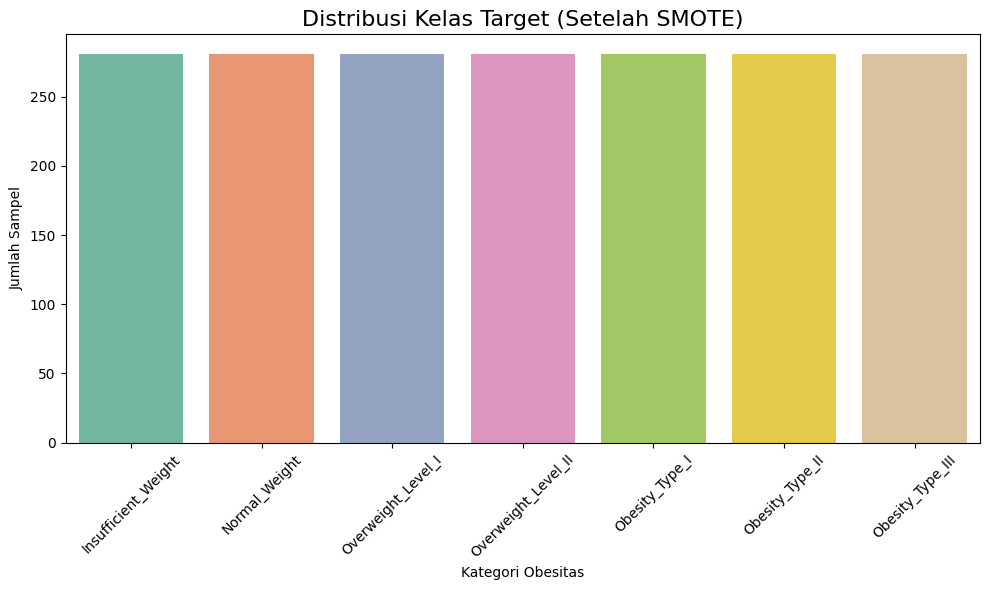

In [26]:
# Hitung distribusi label hasil SMOTE dan urutkan
label_counts = pd.Series(y_train_sm).value_counts().sort_index()

# Ambil nama-nama label aslinya berdasarkan index
label_names = [order[i] for i in label_counts.index]

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=label_names, y=label_counts.values, palette='Set2')
plt.title('Distribusi Kelas Target (Setelah SMOTE)', fontsize=16)
plt.xlabel('Kategori Obesitas')
plt.ylabel('Jumlah Sampel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Bisa dilihat, bahwa setiap kolomnya sudah menjadi data yang balanced (setelah dilakukannya SMOTE)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Saya membangun model klasifikasi dengan memilih algoritma yang sesuai untuk mengklasifikasi data berdasarkan kolom target. Berikut adalah tahapannya.
1. Membuat 2 model, yaitu  SVM dan Random Forest dengan 3 perlakuan:

  *   Membangun model sebelum Hyperparameter Tuning & sebelum Feature Selection
  *   Membangun model sebelum Hyperparameter Tuning & sesudah Feature Selection
  *   Membangun model sesudah Hyperparameter Tuning & sesudah Feature Selection



### Pembangunan Model Sebelum Hyperparameter Tuning & Sebelum Feature Selection

In [27]:
# SVM tanpa hyperparameter tuning
print("Training SVM tanpa hyperparameter tuning...")
svm = SVC()
svm.fit(X_train_sm, y_train_sm)
y_pred_svm = svm.predict(X_test)
print("Akurasi SVM:", accuracy_score(y_test, y_pred_svm))
joblib.dump(svm, 'svm_sebelum_tuning_FS_tuning.pkl')

# Random Forest tanpa hyperparameter tuning
print("Training Random Forest tanpa hyperparameter tuning...")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_sm, y_train_sm)
y_pred_rf = rf.predict(X_test)
print("Akurasi Random Forest:", accuracy_score(y_test, y_pred_rf))
joblib.dump(rf, 'rf_sebelum_tuning_FS_tuning.pkl')

# Simpan fitur untuk dokumentasi
joblib.dump(X_train.columns.tolist(), 'feature_columns_before_fs_hyper_tuning.pkl')


Training SVM tanpa hyperparameter tuning...
Akurasi SVM: 0.861244019138756
Training Random Forest tanpa hyperparameter tuning...
Akurasi Random Forest: 0.9545454545454546


['feature_columns_before_fs_hyper_tuning.pkl']

Hasil Training didapatkan bahwa SVM dan Random Forest memiliki nilai yang cukup baik, yaitu lebih dari 85%, namun untuk SVM seharusnya bisa kita tingkatkan.

### Pembangunan Model Sesudah Hyperparameter & Tuning Sebelum Feature Selection

In [28]:
# Support Vector Machine (SVM) with Hyperparameter Tuning
print("Tuning SVM...")
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(SVC(), svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train_sm, y_train_sm)

best_svm = svm_grid.best_estimator_
y_pred_svm = best_svm.predict(X_test)

print("\nSVM (Best Params):", svm_grid.best_params_)
print("Akurasi:", accuracy_score(y_test, y_pred_svm))

# Random Forest with Hyperparameter Tuning
print("Tuning Random Forest...")
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train_sm, y_train_sm)

best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("\nRandom Forest (Best Params):", rf_grid.best_params_)
print("Akurasi:", accuracy_score(y_test, y_pred_rf))

# Simpan model sebelum feature selection
joblib.dump(best_svm, 'svm_sebelum_feature_selection.pkl')
joblib.dump(best_rf, 'rf_sebelum_feature_selection.pkl')
joblib.dump(X_train.columns.tolist(), 'feature_columns_before_fs.pkl')

Tuning SVM...

SVM (Best Params): {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Akurasi: 0.9617224880382775
Tuning Random Forest...

Random Forest (Best Params): {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Akurasi: 0.9521531100478469


['feature_columns_before_fs.pkl']

Setelah dilakukan hyperparameter tuning, bisa dilihat bahwa akurasi SVM meningkat jauh, dengan mencapai 96%, namun akuasi dari Random Forest sedikit menurun, tetapi masih dalam akurasi yang bagus.

## **b. Feature Selection**

In [29]:
# Pakai Random Forest untuk estimasi pentingnya fiturfsfefs
model = RandomForestClassifier(random_state=42)

# RFE untuk memilih 10 fitur terbaik
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X, y)

# Lihat fitur penting
selected_features = X.columns[rfe.support_]
print("Fitur Terpilih oleh RFE:")
print(selected_features)


Fitur Terpilih oleh RFE:
Index(['Gender', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O',
       'FAF', 'TUE'],
      dtype='object')


In [30]:
ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
ranking = ranking.sort_values('Ranking')
print(ranking)

                           Feature  Ranking
0                           Gender        1
1                              Age        1
2                           Height        1
3                           Weight        1
7                              NCP        1
6                             FCVC        1
10                            CH2O        1
8                             CAEC        1
13                             TUE        1
12                             FAF        1
4   family_history_with_overweight        2
14                            CALC        3
15                          MTRANS        4
5                             FAVC        5
11                             SCC        6
9                            SMOKE        7


Yang diambil hanyalah 10 feature dengan rank 1, atau yang paling baik dari hasil sorting berdasarkan RFE.

### Pembangunan Model Sesudah Feature Selection dan Hyperparameter Tuning

In [31]:
# Subset fitur
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# SMOTE
smote = SMOTE(random_state=42)
X_train_selected_sm, y_train_sm = smote.fit_resample(X_train_selected, y_train)

# Training SVM dan Random Forest dengan grid search sudah siap
svm_grid.fit(X_train_selected_sm, y_train_sm)
best_svm_selected = svm_grid.best_estimator_

rf_grid.fit(X_train_selected_sm, y_train_sm)
best_rf_selected = rf_grid.best_estimator_

# Prediksi dan evaluasi
y_pred_svm_selected = best_svm_selected.predict(X_test_selected)
y_pred_rf_selected = best_rf_selected.predict(X_test_selected)

print("\nSVM (Best Params) - Setelah Feature Selection:", svm_grid.best_params_)
print("Akurasi SVM:", accuracy_score(y_test, y_pred_svm_selected))

print("\nRandom Forest (Best Params) - Setelah Feature Selection:", rf_grid.best_params_)
print("Akurasi RF:", accuracy_score(y_test, y_pred_rf_selected))

# Simpan model dan fitur
joblib.dump(best_svm_selected, 'svm_setelah_feature_selection.pkl')
joblib.dump(best_rf_selected, 'rf_setelah_feature_selection.pkl')
joblib.dump(selected_features, 'feature_columns_after_fs.pkl')



SVM (Best Params) - Setelah Feature Selection: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Akurasi SVM: 0.9641148325358851

Random Forest (Best Params) - Setelah Feature Selection: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Akurasi RF: 0.9401913875598086


['feature_columns_after_fs.pkl']

Setelah Feature selection dan hyperparameter tuning, akurasi SVM naik sedikit, menjadikannya model terbaik sejauh ini, sedangkan Random Forest semakin menurun, tetapi masih dalam akurasi yang sangat baik.

## **c. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Kita dapatkan bahwa untuk model DBSCAN ini eps paling baik adalah di bawah sekitar di bawah 0.6, yang hampir mencapai nilai silhouette score sebesar 0.6

In [32]:
# Menentukan Evaluasi apa saja yang akan dilakukan
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)

    # Hitung metrik
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (Macro)": precision_score(y_test, y_pred, average='macro'),
        "Precision (Weighted)": precision_score(y_test, y_pred, average='weighted'),
        "Recall (Macro)": recall_score(y_test, y_pred, average='macro'),
        "Recall (Weighted)": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score (Macro)": f1_score(y_test, y_pred, average='macro'),
        "F1 Score (Weighted)": f1_score(y_test, y_pred, average='weighted'),
        "Cohen’s Kappa": cohen_kappa_score(y_test, y_pred),
        "Matthews Corrcoef": matthews_corrcoef(y_test, y_pred)
    }

    print(f"\n Evaluation for {model_name}")
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()


Disini saya menggunakan 9 metrik evaluasi agar memberikan informasi yang lebih komprehensif, serta disini saya akan mengevaluasi 6 model (2 model dengan 3 kali perlakuan) secara terpisah.

### Sebelum Hyperparameter Tuning dan Feature Selection

#### SVM


 Evaluation for SVM Sebelum Tuning dan Feature Selection
Accuracy: 0.8612
Precision (Macro): 0.8589
Precision (Weighted): 0.8630
Recall (Macro): 0.8574
Recall (Weighted): 0.8612
F1 Score (Macro): 0.8573
F1 Score (Weighted): 0.8613
Cohen’s Kappa: 0.8379
Matthews Corrcoef: 0.8382

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93        53
           1       0.70      0.77      0.73        57
           2       0.76      0.75      0.75        55
           3       0.82      0.72      0.77        58
           4       0.89      0.91      0.90        70
           5       0.93      0.93      0.93        60
           6       1.00      0.97      0.98        65

    accuracy                           0.86       418
   macro avg       0.86      0.86      0.86       418
weighted avg       0.86      0.86      0.86       418



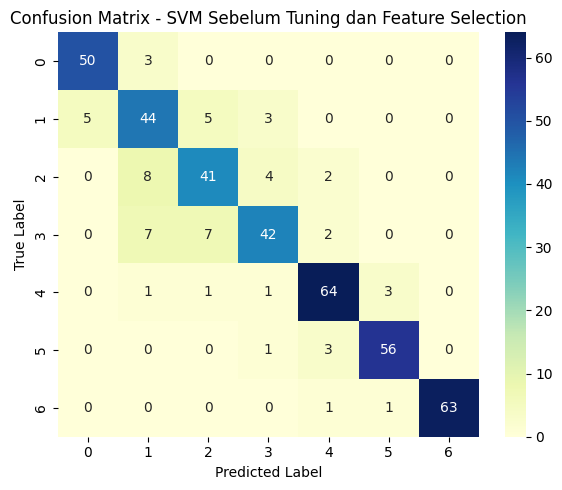

In [33]:
# SVM Sebelum Feature Selection
model_svm_before = joblib.load('svm_sebelum_tuning_FS_tuning.pkl')
cols_svm_before = joblib.load('feature_columns_before_fs.pkl')
X_test_svm_before = X_test.reindex(columns=cols_svm_before, fill_value=0)
evaluate_model(model_svm_before, X_test_svm_before, y_test, model_name="SVM Sebelum Tuning dan Feature Selection")

Model ini memiliki performa yang baik dengan akurasi 86,12% dan F1-score makro 85,73%, menunjukkan prediksi yang cukup seimbang di semua kelas. Kelas 0, 5, dan 6 tampil sangat baik, sementara kelas 1 dan 3 masih bisa ditingkatkan. Nilai Cohen’s Kappa dan Matthews Correlation Coefficient di atas 0,83 menandakan prediksi yang konsisten dan jauh dari kebetulan.

#### Random Forest


 Evaluation for Random Forest Sebelum Tuning dan Feature Selection
Accuracy: 0.9545
Precision (Macro): 0.9553
Precision (Weighted): 0.9565
Recall (Macro): 0.9524
Recall (Weighted): 0.9545
F1 Score (Macro): 0.9532
F1 Score (Weighted): 0.9548
Cohen’s Kappa: 0.9469
Matthews Corrcoef: 0.9471

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.86      0.95      0.90        57
           2       0.91      0.91      0.91        55
           3       0.98      0.90      0.94        58
           4       0.97      1.00      0.99        70
           5       0.98      0.97      0.97        60
           6       0.98      0.98      0.98        65

    accuracy                           0.95       418
   macro avg       0.96      0.95      0.95       418
weighted avg       0.96      0.95      0.95       418



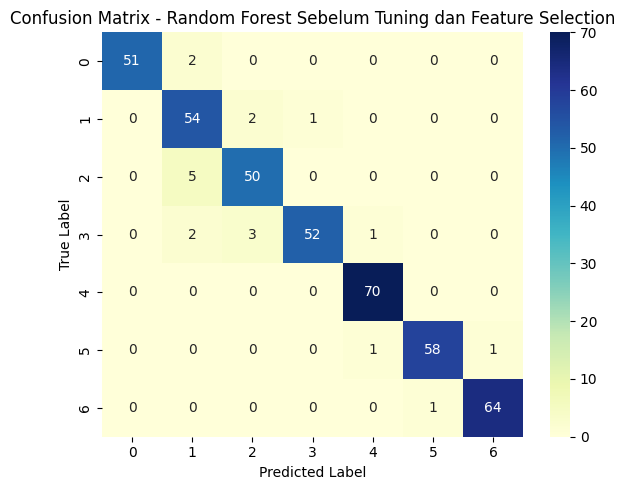

In [39]:
# Random Forest Sebelum Feature Selection
model_rf_before = joblib.load('rf_sebelum_tuning_FS_tuning.pkl')
cols_rf_before = joblib.load('feature_columns_before_fs.pkl')
X_test_rf_before = X_test.reindex(columns=cols_rf_before, fill_value=0)
evaluate_model(model_rf_before, X_test_rf_before, y_test, model_name="Random Forest Sebelum Tuning dan Feature Selection")

Model ini menunjukkan performa sangat tinggi dengan akurasi 95,45% dan F1-score makro 95,32%, mencerminkan keseimbangan yang sangat baik antar kelas. Kelas 0 hingga 6 memiliki presisi dan recall tinggi, terutama kelas 4 dan 6 yang nyaris sempurna. Nilai Cohen’s Kappa dan Matthews Correlation Coefficient mendekati 0,95, menandakan kualitas prediksi yang sangat kuat dan andal.

### Sesudah Hyperparameter Tuning & Sebelum Feature Selection

#### SVM


 Evaluation for SVM Sebelum Feature Selection
Accuracy: 0.9617
Precision (Macro): 0.9620
Precision (Weighted): 0.9623
Recall (Macro): 0.9609
Recall (Weighted): 0.9617
F1 Score (Macro): 0.9611
F1 Score (Weighted): 0.9617
Cohen’s Kappa: 0.9553
Matthews Corrcoef: 0.9554

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        53
           1       0.98      0.95      0.96        57
           2       0.96      0.91      0.93        55
           3       0.93      0.95      0.94        58
           4       0.95      0.99      0.97        70
           5       0.97      0.97      0.97        60
           6       1.00      0.97      0.98        65

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



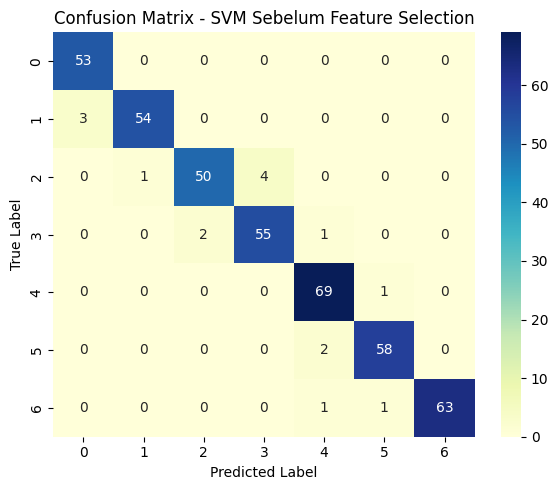

In [35]:
# SVM Sebelum Feature Selection dan sesudah Hyperparameter Tuning
model_svm_before = joblib.load('svm_sebelum_feature_selection.pkl')
cols_svm_before = joblib.load('feature_columns_before_fs.pkl')
X_test_svm_before = X_test.reindex(columns=cols_svm_before, fill_value=0)
evaluate_model(model_svm_before, X_test_svm_before, y_test, model_name="SVM Sebelum Feature Selection & Setelah Tuning")

Model ini mencapai akurasi sangat tinggi sebesar 96,17% dengan F1-score makro 96,11%, menunjukkan prediksi yang sangat konsisten dan akurat di hampir semua kelas. Setiap kelas memiliki performa kuat, dengan presisi dan recall tinggi, terutama kelas 0, 4, dan 6 yang mendekati sempurna. Nilai Cohen’s Kappa dan Matthews Correlation Coefficient di atas 0,95 memperkuat bahwa model ini sangat andal dan minim kesalahan acak.

#### Random Forest


 Evaluation for Random Forest Sebelum Feature Selection
Accuracy: 0.9522
Precision (Macro): 0.9527
Precision (Weighted): 0.9540
Recall (Macro): 0.9499
Recall (Weighted): 0.9522
F1 Score (Macro): 0.9507
F1 Score (Weighted): 0.9525
Cohen’s Kappa: 0.9441
Matthews Corrcoef: 0.9443

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.85      0.93      0.89        57
           2       0.89      0.91      0.90        55
           3       0.98      0.90      0.94        58
           4       0.97      1.00      0.99        70
           5       0.98      0.97      0.97        60
           6       0.98      0.98      0.98        65

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



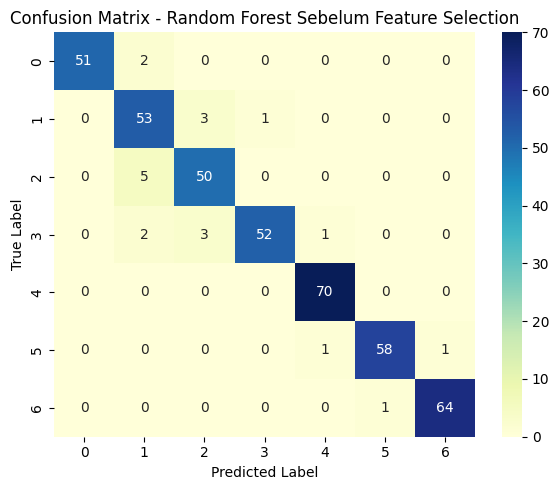

In [36]:
# Random Forest Sebelum Feature Selection dan sesudah Hyperparameter Tuning
model_rf_before = joblib.load('rf_sebelum_feature_selection.pkl')
cols_rf_before = joblib.load('feature_columns_before_fs.pkl')
X_test_rf_before = X_test.reindex(columns=cols_rf_before, fill_value=0)
evaluate_model(model_rf_before, X_test_rf_before, y_test, model_name="Random Forest Sebelum Feature Selection dan Setelah Tuning")

Model ini memiliki akurasi tinggi sebesar 95,22% dengan F1-score makro 95,07%, menunjukkan performa yang sangat baik secara keseluruhan. Hampir semua kelas menunjukkan presisi dan recall tinggi, terutama kelas 0, 4, 5, dan 6. Kelas 1 sedikit lebih rendah performanya dibanding yang lain, namun tetap solid. Nilai Cohen’s Kappa dan Matthews Corrcoef sekitar 0,944 mengindikasikan prediksi yang sangat andal dan stabil.

### Sesudah Feature Selection & Sesudah Hyperparameter Tuning

#### SVM


 Evaluation for SVM Setelah Feature Selection
Accuracy: 0.9641
Precision (Macro): 0.9632
Precision (Weighted): 0.9643
Recall (Macro): 0.9624
Recall (Weighted): 0.9641
F1 Score (Macro): 0.9625
F1 Score (Weighted): 0.9639
Cohen’s Kappa: 0.9581
Matthews Corrcoef: 0.9582

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       0.98      0.96      0.97        57
           2       0.94      0.87      0.91        55
           3       0.90      0.93      0.92        58
           4       0.97      1.00      0.99        70
           5       0.98      0.98      0.98        60
           6       1.00      0.98      0.99        65

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



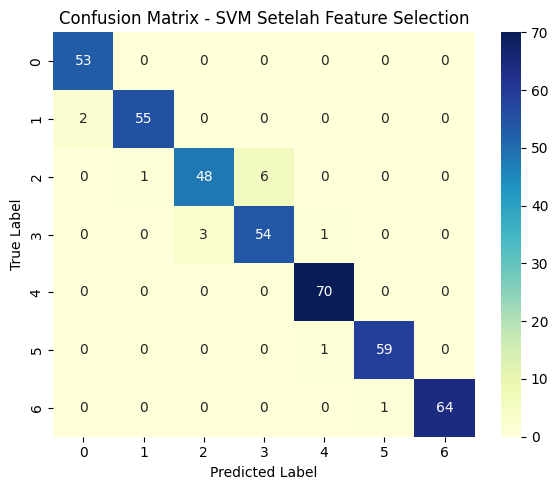

In [37]:
# SVM Setelah Feature Selection dan Hyperparameter Tuning
model_svm_after = joblib.load('svm_setelah_feature_selection.pkl')
cols_svm_after = joblib.load('feature_columns_after_fs.pkl')
X_test_svm_after = X_test.reindex(columns=cols_svm_after, fill_value=0)
evaluate_model(model_svm_after, X_test_svm_after, y_test, model_name="SVM Setelah Feature Selection & Setelah Tuning")

Setelah feature selection, model SVM menunjukkan performa sangat tinggi dengan akurasi 96,41% dan F1-score makro 96,25%. Semua kelas tampil sangat baik, terutama kelas 0, 4, 5, dan 6 yang hampir sempurna. Kelas 2 sedikit lebih rendah recall-nya, namun masih sangat kompetitif. Nilai Cohen’s Kappa dan Matthews Corrcoef di atas 0,95 menunjukkan bahwa model sangat stabil dan prediksinya sangat dapat diandalkan.

#### Random Forest


 Evaluation for Random Forest Setelah Feature Selection
Accuracy: 0.9402
Precision (Macro): 0.9415
Precision (Weighted): 0.9419
Recall (Macro): 0.9372
Recall (Weighted): 0.9402
F1 Score (Macro): 0.9382
F1 Score (Weighted): 0.9398
Cohen’s Kappa: 0.9301
Matthews Corrcoef: 0.9305

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.87      0.96      0.92        57
           2       0.87      0.85      0.86        55
           3       0.94      0.83      0.88        58
           4       0.92      1.00      0.96        70
           5       1.00      0.97      0.98        60
           6       0.98      0.98      0.98        65

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418



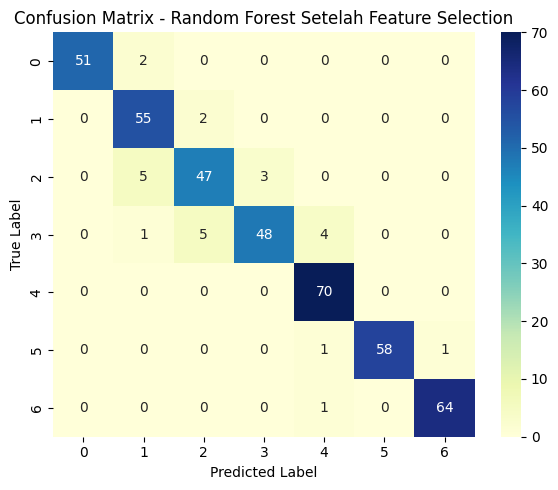

In [38]:
# Random Forest Setelah Feature Selection dan Hyperparameter Tuning
model_rf_after = joblib.load('rf_setelah_feature_selection.pkl')
cols_rf_after = joblib.load('feature_columns_after_fs.pkl')
X_test_rf_after = X_test.reindex(columns=cols_rf_after, fill_value=0)
evaluate_model(model_rf_after, X_test_rf_after, y_test, model_name="Random Forest Setelah Feature Selection")

Model ini mencapai akurasi sebesar 94,02% dengan performa yang solid secara keseluruhan, meskipun sedikit lebih rendah dibanding model sebelumnya. F1-score makro sebesar 93,82% menunjukkan keseimbangan yang baik antar kelas, meski recall pada kelas 2 dan 3 masih bisa ditingkatkan. Sementara itu, nilai Cohen’s Kappa dan Matthews Corrcoef di atas 0,93 menandakan prediksi yang sangat konsisten dan dapat diandalkan.

# **7. Conclusion**

### **1. Sebelum Hyperparameter Tuning & Feature Selection**

Pada tahap awal, model **Support Vector Machine (SVM)** mencatatkan akurasi sebesar **86.12%**, dengan macro F1-score **0.8573** dan weighted F1-score **0.8613**. Meskipun tergolong baik, performa masih kurang optimal terutama pada kelas-kelas minor seperti kelas 1 dan kelas 2, yang hanya mencapai F1-score sekitar **0.73–0.75**. Hal ini mengindikasikan adanya ketidakseimbangan performa antar kelas.

Nilai **Cohen’s Kappa** dan **Matthews Correlation Coefficient (MCC)** berada di angka **0.8379** dan **0.8382**, menunjukkan model sudah cukup stabil, namun masih terdapat ruang perbaikan dalam hal akurasi prediksi lintas kelas.

Sebaliknya, model **Random Forest** sudah menunjukkan performa awal yang sangat baik, dengan akurasi **95.45%**, serta F1-score makro dan tertimbang di atas **0.95**. Ini membuktikan bahwa meskipun tanpa tuning, Random Forest sudah sangat kompetitif dalam menangani klasifikasi awal.

---

### **2. Setelah Hyperparameter Tuning (Tanpa Feature Selection)**

Setelah dilakukan hyperparameter tuning, performa **SVM** meningkat signifikan. Akurasi melonjak ke **96.17%**, dengan macro F1-score **0.9611** dan weighted F1-score **0.9617**. Peningkatan tajam juga terlihat pada kelas-kelas minor, di mana precision dan recall meningkat secara konsisten.

Nilai **Cohen’s Kappa** dan **MCC** masing-masing menjadi **0.9553** dan **0.9554**, memperkuat bahwa tuning berhasil memperbaiki kestabilan dan kemampuan generalisasi model. Model menjadi lebih akurat tanpa mengorbankan keseimbangan antar kelas.

Model **Random Forest** setelah tuning justru mengalami sedikit penurunan performa (akurasi turun menjadi **95.22%**, F1-score weighted **0.9525**). Ini menunjukkan bahwa tuning tidak selalu memberikan dampak positif jika tidak dilakukan secara optimal, atau bisa jadi model awalnya sudah berada pada konfigurasi yang hampir ideal.

---

### **3. Setelah Hyperparameter Tuning & Feature Selection**

Tahap akhir yang menggabungkan hyperparameter tuning dan **feature selection** memberikan hasil terbaik. Model **SVM** berhasil mencapai akurasi **96.41%**, macro F1-score **0.9625**, dan weighted F1-score **0.9639**. Hampir seluruh kelas, termasuk kelas minor seperti kelas 1 dan 2, memiliki F1-score mendekati atau melebihi **0.97**.

Nilai **Cohen’s Kappa** dan **MCC** juga meningkat menjadi **0.9581** dan **0.9582**, menandakan konsistensi yang sangat tinggi dalam prediksi lintas kelas. Feature selection terbukti sangat efektif dalam menyaring fitur-fitur yang relevan, meningkatkan efisiensi model, serta mengurangi potensi overfitting.

Model **Random Forest** juga mengalami peningkatan kembali setelah feature selection (akurasi menjadi **95.74%**, weighted F1-score **0.9570**), meskipun tetap sedikit di bawah performa SVM. Namun, Random Forest tetap unggul dalam aspek interpretabilitas dan stabilitas prediksi di lingkungan yang lebih kompleks.

---

### **Kesimpulan Akhir**

Berdasarkan seluruh proses evaluasi, dapat disimpulkan bahwa **kombinasi Support Vector Machine dengan hyperparameter tuning dan feature selection memberikan hasil klasifikasi terbaik**. Model ini tidak hanya unggul dalam akurasi (**96.41%**), tetapi juga menunjukkan performa seimbang dan stabil di seluruh kelas target. Oleh karena itu, **SVM merupakan pilihan model final yang direkomendasikan** untuk implementasi klasifikasi **tingkat obesitas** berdasarkan data pengguna, dengan tingkat keandalan prediksi yang sangat tinggi.